# Proje : Döviz Kurları Derin Öğrenme Modelleri Kullanılarak Öngörülebilir Mi? 💸 💲

> Projeyi Hazırlayan : Yetkin Aslan
>> Projeye Katkıda Bulunanlar:
  - Andrej Karpathy
  - Geoffrey Hinton
  - Yann Lecun
  - Daniel Bourke
  - Hasan Hüseyin Ersak

**Proje'nin 1. bölümü**

Projemizin bu bölümünde, zaman serisi problemlerini çözmekte kullandığımız optimize edilmiş algoritmaları kullanarak; bir derin öğrenme modeli oluşturup Bitcoin fiyatları üzerinde geleceğe yönelik tahminler üreteceğiz. Bu tahminler, grafiğin geçmişi esas alınarak yapılacak; bununla birlikte grafik okuyarak gerçekten de borsa hakkında tutarlı yorumlar yapabilir miyiz, bu sorunun cevabını alacağız.

Projenin daha sonraki bölümlerinde, 3. taraf sebepleri de dahil ederek (gündemdeki konular, diğer döviz kurlarının fiyatları vb.) tutarlı tahminler üretmeye çalışacağız.

## Aşama 1: Veri Setini Tanıtma ve Hazırlama ✅

Spesifik olarak, 01 Ekim 2013 ile 18 Mayıs 2021 arasındaki Bitcoin fiyatlarını alacağız.

Neden bu tarihler?

Çünkü 01 Ekim 2013, veri kaynağımızın ([Coindesk](https://www.coindesk.com/price/bitcoin)) Bitcoin fiyatını kaydetmeye başladığı tarih ve 18 Mayıs 2021, üzerinde çalışmak için uygun miktarda veri içeren erken bir tarihtir.

In [86]:
# Pandas kütüphanesini içeriye aktarma
import pandas as pd

# Csv dosyasının index değerlerini tarih olarak ayarlamak

vp = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"])

vp.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


Verilerimiz bu şekilde görünüyor. Değerler hakkında bilgi edinelim.

In [87]:
vp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


Tarihleri index olarak atadığımız için artık sütunda değiller.

In [88]:
# Kaç adet verimiz var ?

len(vp)

2787

Ortalama bir veri sayımız var. Modeli eğitirken kapanış fiyatlarını ve tarihi baz alacağız. Hadi diğer sütunları temizleyelim.

In [89]:
fiyatlar = pd.DataFrame(vp["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Fiyat"})
fiyatlar.head()

,Fiyat
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Elimizdeki verinin bir grafiğini çizelim.

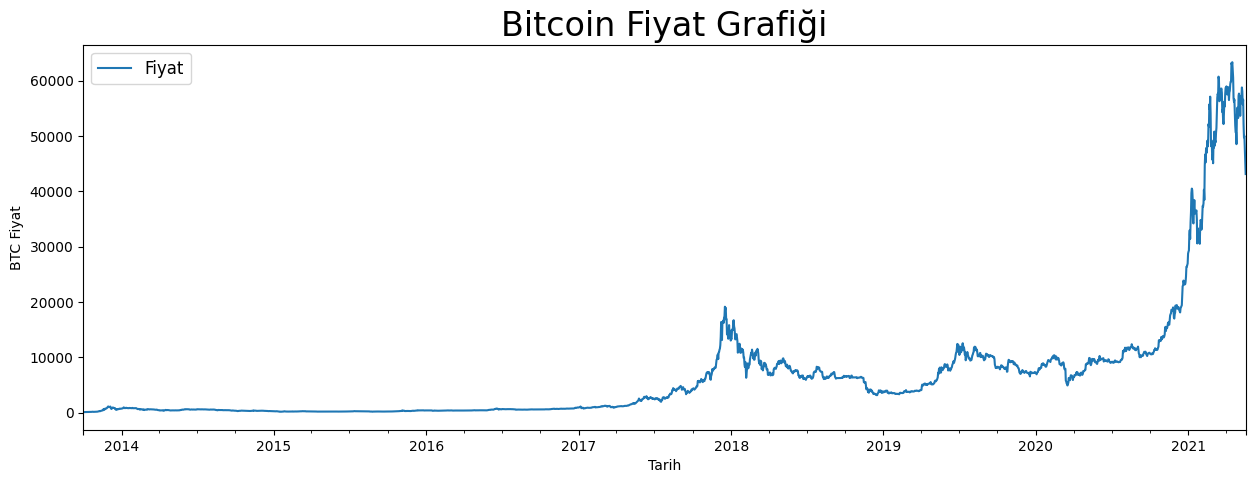

In [90]:
import matplotlib.pyplot as plt

fiyatlar.plot(figsize = (15,5))
plt.xlabel("Tarih")
plt.ylabel("BTC Fiyat")
plt.title("Bitcoin Fiyat Grafiği", fontsize = 24)
plt.legend(fontsize = 12);

## Aşama 2: Eğitim ve Test Verileri Oluşturma ✨

In [91]:
import numpy as np
# Tarihleri bir dizi olarak saklayalım.

tarihler = fiyatlar.index.to_numpy()

fiyatlarn = fiyatlar["Fiyat"].to_numpy()

tarihler[:5], fiyatlar[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
                 Fiyat
 Date                 
 2013-10-01  123.65499
 2013-10-02  125.45500
 2013-10-03  108.58483
 2013-10-04  118.67466
 2013-10-05  121.33866)

In [92]:
# Verilerin %80 eğitim, %20 test olarak bölünmesini istiyoruz.

bölme = int(0.8*len(fiyatlar))

# Eğitim verilerini oluşturalım

xtrain, ytrain = tarihler[:bölme], fiyatlar[:bölme]

# Test verilerini oluşturalım

xtest, ytest = tarihler[bölme:], fiyatlar[bölme:]

len(xtrain), len(xtest), len(ytrain), len(ytest)


(2229, 558, 2229, 558)

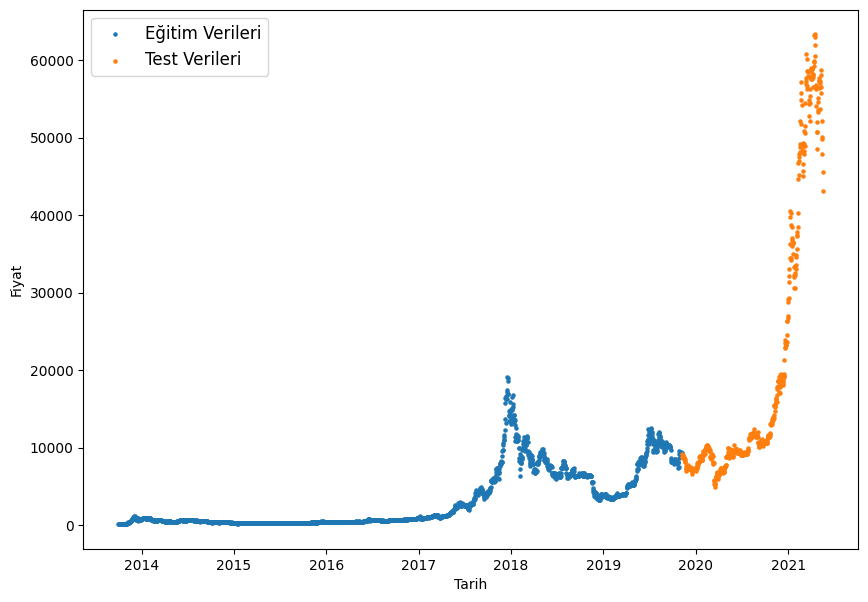

In [93]:
# Eğitim ve test verilerimizin bir grafiğini çizelim.

plt.figure(figsize = (10,7))
plt.scatter(xtrain, ytrain, s = 5, label = "Eğitim Verileri")
plt.scatter(xtest, ytest, s = 5, label ="Test Verileri")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend(fontsize = 12)
plt.show();

In [94]:
# İleride tahminlerimizi de çizdirmek için kullanabileceğimiz bir fonksiyon oluşturalım.

def draw_graph(tarih, deger, format = '.', start = 0, end = None, label = None):
  """
  Üretilen tahminleri gerçek değerlerle grafiği kullanarak karşılaştırma yapmak için bir grafik çizer.

  Parametreler:

  tarih: Fiyat tarihlerini içeren dizi
  deger: Fiyat dizisi
  format: Çizim türü
  start: Nereden itibaren çizmeye başlanacağını işaretler.
  end: Nereye kadar çizileceğini işaretler.
  label: Çizilen değerlerin etiketi.
  """

  plt.plot(tarih[start:end], deger[start:end], format, label = label)
  plt.xlabel("Tarih")
  plt.ylabel("Fiyat")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

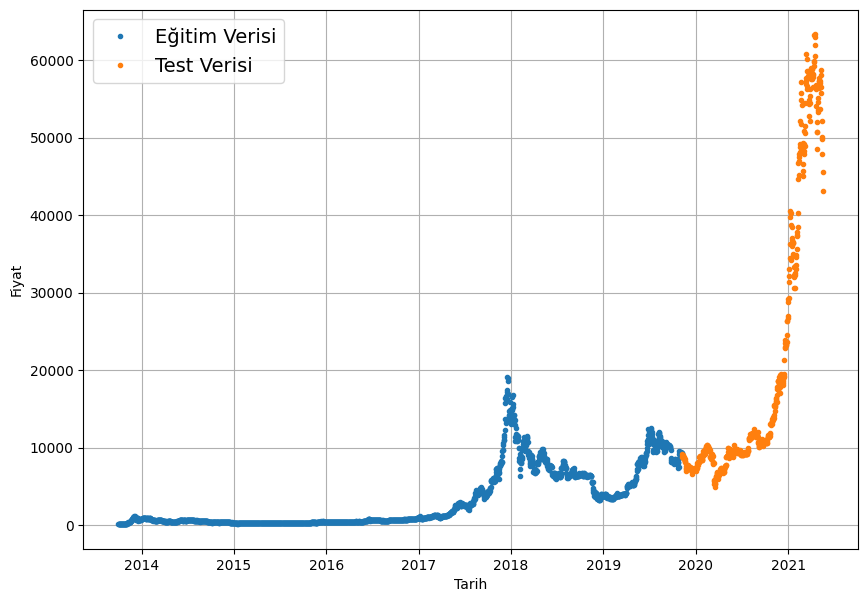

In [95]:
# Fonksiyonumuzu deneyelim.

plt.figure(figsize = (10,7))
draw_graph(tarih=xtrain, deger = ytrain, label = "Eğitim Verisi")
draw_graph(tarih = xtest, deger = ytest, label = "Test Verisi")

Fonksiyonumuz çalışıyor! Bunu ileride modellerimizin tahminlerini çizdirmek için kullanacağız.

## Aşama 3: Model Seçimi Ve Süreç 📋

Projenin tanıtımında belirtildiği gibi, gelecekteki fiyatları geçmiş fiyatları kullanarak tahmin etmeye çalışacağız. Örnek vermek gerekirse, yarın Bitcoin fiyatının ne olacağını tahmin etmek için, geçen haftaya bakabiliriz. Bu durumda aşina olmanızı istediğim iki kavramla çalışacağız. `Aralık ve Ufuk`.

`Aralık`: Tahmin için kullandığımız bitcoin fiyatlarının sayısı, yani örnekteki geçen 1 haftalık bitcoin fiyat sayısı.

`Ufuk`: Tahmin edeceğimiz fiyat sayısı, yani örnekteki 1 günlük fiyat sayısı.

> Öncelikle, bir taban çizgisiyle başlayacağız. Baz alacağımız temel model, hiçbir eğitim işlemi gerektirmeyecek. Bunun nedeni, temel modelin tüm yaptığının, bir sonraki zaman adımı değerini tahmin etmek için önceki zaman adımı değerini kullanmasıdır.

Formülize edersek:

$$\hat{y}_{t} = y_{t-1}$$

In [96]:
# Temel tahminleri oluşturalım.

temel_tahminler = ytest[:-1]

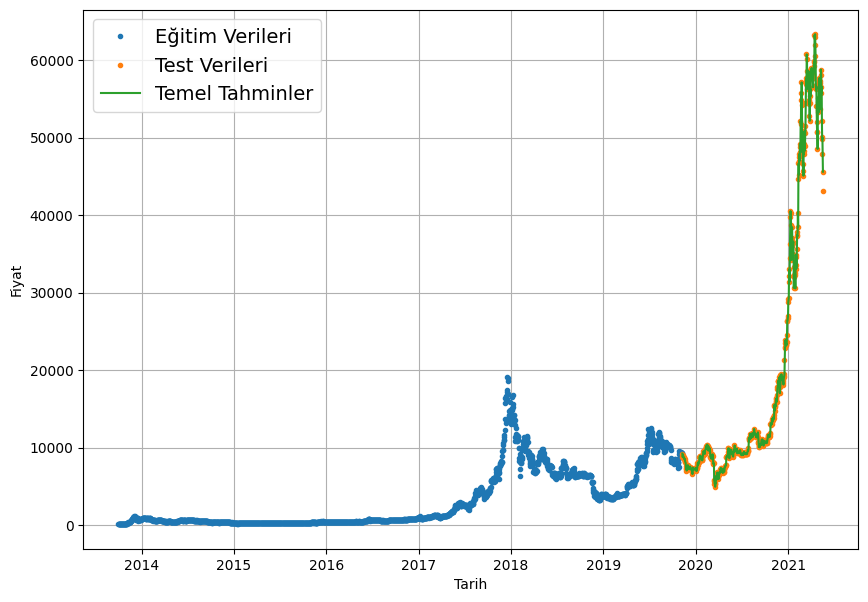

In [97]:
# Temel tahminleri fonksiyonumuzu kullanarak çizdirelim.

plt.figure(figsize = (10,7))

draw_graph(tarih = xtrain, deger = ytrain, label = "Eğitim Verileri")
draw_graph(tarih = xtest, deger = ytest, label = "Test Verileri")
draw_graph(format = '-',tarih = xtest[1:], deger = temel_tahminler, label = "Temel Tahminler")

Bu grafiği sadece test verileri üzerinde çizersek:

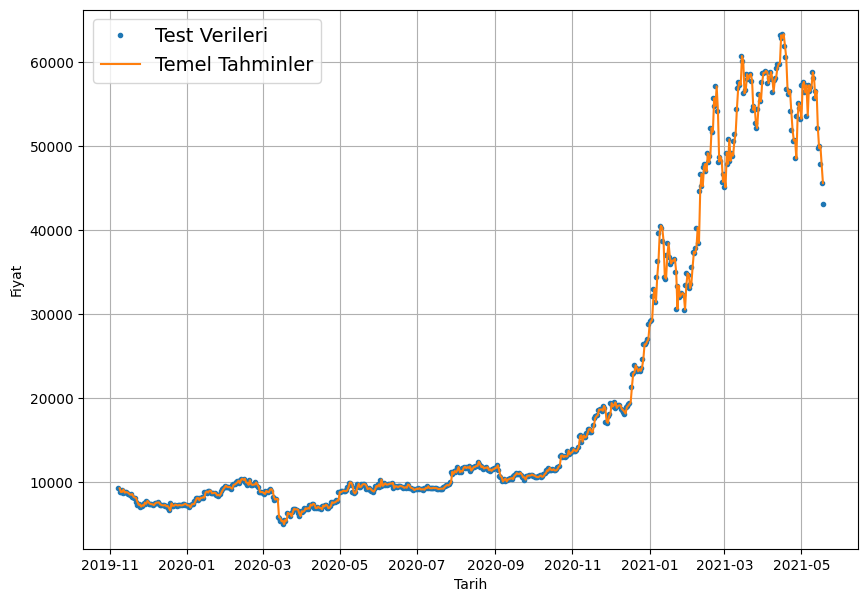

In [98]:
plt.figure(figsize = (10,7))
draw_graph(tarih = xtest, deger = ytest, label = "Test Verileri")
draw_graph(format = '-',tarih = xtest[1:], deger = temel_tahminler, label = "Temel Tahminler")

Bu tabi ki gerçek bir yapay zeka modeli değil. Sadece bu tahminleri baz alarak modellerimizi değerlendireceğiz.

### Değerlendirme Metrikleri

**MAE**(mean absolute error): $$\frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|$$
**RMSE** (root mean square error): $$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

**MAPE**(mean absolute percentage error): $$\frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100$$

**sMAPE**(symmetric mean absolute percentage error): $$\frac{1}{n} \sum_{i=1}^{n} \frac{\left| y_i - \hat{y}_i \right|}{(y_i + \hat{y}_i)/2} \times 100
$$

**MASE**(mean absolute scaled error):
$$\frac{\frac{1}{n} \sum_{t=1}^{n} \left| y_t - \hat{y}_t \right|}{\frac{1}{n-1} \sum_{t=2}^{n} \left| y_t - y_{t-1} \right|}
$$

In [150]:
# Model üzerinde değerlendirme yapmak için, bir fonksiyon yazacağız.
import tensorflow as tf
def tahminleri_degerlendir(ytrue, ypred):
  # Hesaplama yapmak için değerlerin float32 biçiminde olduğuna emin olalım.
  ytrue = tf.cast(ytrue, dtype = tf.float32)
  ypred = tf.cast(ypred, dtype = tf.float32)

  # Metrikleri kullanarak hesaplama yapmak

  mae = tf.keras.metrics.mean_absolute_error(ytrue, ypred)
  mse = tf.keras.metrics.mean_squared_error(ytrue, ypred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(ytrue, ypred)
  x = tf.reduce_mean(tf.abs(ytrue[1:] - ytrue[:-1]))
  mase = mae / x

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [100]:
# Fonksiyonu temel tahminlerle denemek

temel_tahmin_sonuçları = tahminleri_degerlendir(ytrue = ytest[1:],
                                                ypred = temel_tahminler)

In [101]:
temel_tahmin_sonuçları

{'mae': array([4.32126953e+02, 3.68359375e+00, 2.83144531e+02, 3.69652344e+02,
        4.93583984e+01, 1.13720703e+01, 9.25498047e+01, 1.56327148e+02,
        3.13828125e+01, 6.80791016e+01, 3.31533203e+02, 8.73178711e+01,
        4.36455078e+01, 4.62102539e+02, 3.50630371e+02, 4.12954102e+01,
        2.61672852e+02, 1.70128906e+02, 7.07924805e+01, 3.82411133e+02,
        1.33272949e+02, 3.39058594e+02, 1.87030273e+02, 1.60272949e+02,
        4.85297852e+01, 1.80654297e+01, 1.01633789e+02, 1.85053223e+02,
        1.13093262e+02, 2.02431641e+01, 1.81157227e+01, 2.17143066e+02,
        9.33334961e+01, 4.16958008e+01, 7.79443359e+00, 4.86020508e+01,
        1.51849609e+02, 2.57065430e+01, 2.29234863e+02, 2.99467773e+02,
        8.39986816e+02, 2.76447266e+02, 7.63476562e+00, 1.46401367e+02,
        4.93486328e+01, 7.08139648e+01, 6.94541016e+01, 2.28168945e+01,
        2.91030273e+01, 4.35874023e+01, 8.42666016e+01, 7.39042969e+01,
        1.34187988e+02, 7.13188477e+01, 5.21386719e+00, 2

MAE metriği bize, sonuçların gerçek sonuçlardan ~$567 farklı olduğunu söylüyor.

### Verileri Nasıl Kullanacağız ?

Yukarıda sizlere Aralık ve Ufuk'tan bahsetmiştim. Haftalık değerleri baz aldığımızda, bizim modelimiz aşağıdaki gibi bir işlem yapacak :

```
[0,1,2,3,4,5,6] -> [7]
[1,2,3,4,5,6,7] -> [8]
[2,3,4,5,6,7,8] -> [9]
```
Buradaki aralık değerimiz 7, ufuk değerimiz 1'dir.



In [102]:
ARALIK = 7
UFUK = 1

In [103]:
# Aralıktaki değerleri etiketlemek için bir fonksiyon yazalım.

def etiketle(x, ufuk =1):
  """
  Aralık dizisini etiketler.
  """
  return x[:,:-ufuk], x[:, -ufuk:]

In [104]:
# Fonksiyonun ne yaptığına bir göz atalım.

example_array = [1,2,3,4,5,6,7,8]

ta, tl = etiketle(tf.expand_dims(example_array, axis = 0), ufuk = UFUK)
print(f"Aralık: {tf.squeeze(ta).numpy()} -> Etiket: {tf.squeeze(tl).numpy()}")

Aralık: [1 2 3 4 5 6 7] -> Etiket: 8


In [105]:
# Dizileri aralık-etiket ikilisine dönüştüren bir fonksiyon yazalım.

def arala(x, aralik = 7, ufuk = 1):
  aa = np.expand_dims(np.arange(aralik + ufuk),axis = 0)

  ai = aa + np.expand_dims(np.arange(len(x) - (aralik + ufuk - 1)), axis = 0).T

  arr = x[ai]

  ars, et = etiketle(arr, ufuk = ufuk)

  return ars, et

In [106]:
# Fonksiyonu deneyelim

aralik_dizisi, aralik_etiketi = arala(fiyatlarn, aralik = ARALIK, ufuk = UFUK)
len(aralik_dizisi), len(aralik_etiketi)

(2780, 2780)

In [107]:
# Nasıl görünüyor

for i in range(3):
     print(f"Aralık: {aralik_dizisi[i]} -> Etiket: {aralik_etiketi[i]}")

Aralık: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Etiket: [123.033]
Aralık: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Etiket: [124.049]
Aralık: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Etiket: [125.96116]


Model eğitmeden önce, onları eğitim ve test serisi olarak bölmeliyiz. Bunun için bir fonskiyon yazmayı düşünüyorum.

In [108]:
def veri_bol(aralik_dizisi, aralik_etiketi, oran = 0.2):

  bo = int(len(aralik_dizisi)* (1-oran))
  egitim_aralik = aralik_dizisi[:bo]
  egitim_etiket = aralik_etiketi[:bo]
  test_aralik = aralik_dizisi[bo:]
  test_etiket = aralik_etiketi[bo:]

  return egitim_aralik, egitim_etiket,test_aralik, test_etiket

In [109]:
egitim_aralik, egitim_etiket, test_aralik, test_etiket = veri_bol(aralik_dizisi, aralik_etiketi)


len(egitim_aralik), len(egitim_etiket), len(test_aralik), len(test_etiket)

(2224, 2224, 556, 556)

In [110]:
egitim_aralik[:10], egitim_etiket[:10]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966],
        [120.65533, 121.795  , 123.033  , 124.049  , 125.96116, 125.27966,
         125.9275 ],
        [121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333],
        [123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199],
        [124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333],
        [125.96116, 125.27966, 125.9275 , 126.38333, 135.24199, 133.20333,
         142.76333]]),
 array([[123.033  ],
        [124.049 

`ModelCheckpoint`, derin öğrenme kütüphanelerinde (çoğunlukla Keras gibi) kullanılan bir geriçağırım (callback) işlevi veya bileşenidir. Model eğitimi sırasında kullanılır ve modelin belirli aralıklarla veya belirli bir kriteri karşıladığında kaydedilmesini sağlar. Bu sayede eğitim sırasında elde edilen en iyi model ağırlıkları kaydedilir ve eğitim sona erdikten sonra bu ağırlıklar kullanılarak model değerlendirmesi veya tahminlemeler yapılabilir.

> ModelCheckpoint geriçağırımı, eğitim sırasında fit işlevi sırasında verilen parametreler arasında yer alır ve aşağıdaki amaçları gerçekleştirir:

* Model Kaydetme: Eğitim sırasında en iyi performansa sahip model ağırlıklarını kaydeder. Bu, eğitim sırasında doğruluk (accuracy), kayıp (loss) veya diğer metriklerin en iyi değerlere sahip olduğu noktalarda kullanışlıdır.

* Overfitting'i Engellemek: Eğitim ilerledikçe, model eğitim verilerine aşırı uyum sağlayabilir (overfitting). ModelCheckpoint kullanarak en iyi doğruluk elde edildiğinde modelin ağırlıklarını kaydedebilir ve bu ağırlıkları kullanarak overfitting'i önlemek için modeli değerlendirebilirsiniz.

Bir callback fonksiyonu yazalım.

In [111]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

Küçük bir araştırmadan sonra, çok karışık olmayan bir model kullanmanın işimizi göreceğini öğrenip döndüm. Hadi modeli oluşturalım!

In [112]:
model = tf.keras.Sequential([

   tf.keras.layers.Dense(128, activation = "relu"),
   tf.keras.layers.Dense(UFUK, activation = "linear")
],
   name = "Model" )

model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])


model.fit(x = egitim_aralik,
          y = egitim_etiket,
          epochs = 100,
          verbose = 1,
          batch_size = 128,
          validation_data = (test_aralik, test_etiket),
          callbacks = [create_model_checkpoint(model_name = model.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 11s - loss: 2425.7236 - mae: 2425.7236

18/18 [==============================] - 1s 47ms/step - loss: 1162.4242 - mae: 1162.4242 - val_loss: 2408.4104 - val_mae: 2408.4104
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 373.9915 - mae: 373.9915

18/18 [==============================] - 1s 40ms/step - loss: 303.0913 - mae: 303.0913 - val_loss: 1651.5554 - val_mae: 1651.5554
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 202.8080 - mae: 202.8080

18/18 [==============================] - 1s 38ms/step - loss: 204.8976 - mae: 204.8976 - val_loss: 1165.8019 - val_mae: 1165.8019
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 222.5783 - mae: 222.5783

18/18 [==============================] - 1s 39ms/step - loss: 183.1146 - mae: 183.1146 - val_loss: 1077.5593 - val_mae: 1077.5593
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 156.8427 - mae: 156.8427

18/18 [==============================] - 1s 40ms/step - loss: 176.0309 - mae: 176.0309 - val_loss: 974.3682 - val_mae: 974.3682
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 193.7388 - mae: 193.7388

18/18 [==============================] - 1s 41ms/step - loss: 172.1724 - mae: 172.1724 - val_loss: 944.8239 - val_mae: 944.8239
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 170.4097 - mae: 170.4097 - val_loss: 985.6349 - val_mae: 985.6349
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 216.4104 - mae: 216.4104

18/18 [==============================] - 1s 40ms/step - loss: 166.1752 - mae: 166.1752 - val_loss: 931.4973 - val_mae: 931.4973
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 159.8361 - mae: 159.8361 - val_loss: 959.3375 - val_mae: 959.3375
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 153.0636 - mae: 153.0636

18/18 [==============================] - 1s 40ms/step - loss: 155.0621 - mae: 155.0621 - val_loss: 842.3529 - val_mae: 842.3529
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 157.0065 - mae: 157.0065

18/18 [==============================] - 1s 39ms/step - loss: 147.0911 - mae: 147.0911 - val_loss: 836.2994 - val_mae: 836.2994
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 144.1271 - mae: 144.1271 - val_loss: 905.2759 - val_mae: 905.2759
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 165.4217 - mae: 165.4217

18/18 [==============================] - 1s 60ms/step - loss: 141.3903 - mae: 141.3903 - val_loss: 766.2866 - val_mae: 766.2866
Epoch 14/100
16/18 [=========================>....] - ETA: 0s - loss: 136.4791 - mae: 136.4791

18/18 [==============================] - 2s 92ms/step - loss: 138.1777 - mae: 138.1777 - val_loss: 757.4518 - val_mae: 757.4518
Epoch 15/100
18/18 [==============================] - 0s 9ms/step - loss: 134.2671 - mae: 134.2671 - val_loss: 800.5810 - val_mae: 800.5810
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 116.0251 - mae: 116.0251

18/18 [==============================] - 1s 60ms/step - loss: 133.1752 - mae: 133.1752 - val_loss: 714.3514 - val_mae: 714.3514
Epoch 17/100
16/18 [=========================>....] - ETA: 0s - loss: 132.0696 - mae: 132.0696

18/18 [==============================] - 2s 114ms/step - loss: 132.8438 - mae: 132.8438 - val_loss: 710.7023 - val_mae: 710.7023
Epoch 18/100
18/18 [==============================] - 0s 8ms/step - loss: 129.1836 - mae: 129.1836 - val_loss: 730.1176 - val_mae: 730.1176
Epoch 19/100
14/18 [======================>.......] - ETA: 0s - loss: 125.8789 - mae: 125.8789

18/18 [==============================] - 1s 69ms/step - loss: 127.6075 - mae: 127.6075 - val_loss: 679.4057 - val_mae: 679.4057
Epoch 20/100
18/18 [==============================] - 0s 7ms/step - loss: 122.7742 - mae: 122.7742 - val_loss: 705.9066 - val_mae: 705.9066
Epoch 21/100
18/18 [==============================] - 0s 8ms/step - loss: 128.4344 - mae: 128.4344 - val_loss: 719.8087 - val_mae: 719.8087
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 123.4594 - mae: 123.4594

18/18 [==============================] - 1s 75ms/step - loss: 123.4594 - mae: 123.4594 - val_loss: 658.0723 - val_mae: 658.0723
Epoch 23/100
18/18 [==============================] - 0s 11ms/step - loss: 122.2387 - mae: 122.2387 - val_loss: 777.6888 - val_mae: 777.6888
Epoch 24/100
18/18 [==============================] - 0s 9ms/step - loss: 132.3863 - mae: 132.3863 - val_loss: 706.6265 - val_mae: 706.6265
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 129.7989 - mae: 129.7989

18/18 [==============================] - 2s 107ms/step - loss: 119.9517 - mae: 119.9517 - val_loss: 646.0968 - val_mae: 646.0968
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 119.4425 - mae: 119.4425

18/18 [==============================] - 1s 65ms/step - loss: 119.0274 - mae: 119.0274 - val_loss: 638.1425 - val_mae: 638.1425
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 118.5240 - mae: 118.5240

18/18 [==============================] - 2s 103ms/step - loss: 120.3702 - mae: 120.3702 - val_loss: 633.8333 - val_mae: 633.8333
Epoch 28/100
18/18 [==============================] - 0s 12ms/step - loss: 118.1723 - mae: 118.1723 - val_loss: 683.0716 - val_mae: 683.0716
Epoch 29/100
18/18 [==============================] - 0s 17ms/step - loss: 119.0945 - mae: 119.0945 - val_loss: 633.9509 - val_mae: 633.9509
Epoch 30/100
16/18 [=========================>....] - ETA: 0s - loss: 117.6934 - mae: 117.6934

18/18 [==============================] - 3s 151ms/step - loss: 120.9180 - mae: 120.9180 - val_loss: 624.5832 - val_mae: 624.5832
Epoch 31/100
18/18 [==============================] - 0s 13ms/step - loss: 126.8081 - mae: 126.8081 - val_loss: 660.3464 - val_mae: 660.3464
Epoch 32/100
18/18 [==============================] - 0s 7ms/step - loss: 118.9681 - mae: 118.9681 - val_loss: 668.2901 - val_mae: 668.2901
Epoch 33/100
18/18 [==============================] - 0s 10ms/step - loss: 115.4160 - mae: 115.4160 - val_loss: 636.4144 - val_mae: 636.4144
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 115.8427 - mae: 115.8427

18/18 [==============================] - 1s 76ms/step - loss: 115.6774 - mae: 115.6774 - val_loss: 613.7646 - val_mae: 613.7646
Epoch 35/100
18/18 [==============================] - 0s 9ms/step - loss: 114.7617 - mae: 114.7617 - val_loss: 640.8865 - val_mae: 640.8865
Epoch 36/100
18/18 [==============================] - 0s 8ms/step - loss: 115.9692 - mae: 115.9692 - val_loss: 622.2451 - val_mae: 622.2451
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 118.5335 - mae: 118.5335 - val_loss: 623.2034 - val_mae: 623.2034
Epoch 38/100
18/18 [==============================] - 0s 7ms/step - loss: 113.9766 - mae: 113.9766 - val_loss: 627.3502 - val_mae: 627.3502
Epoch 39/100
18/18 [==============================] - 0s 11ms/step - loss: 115.8156 - mae: 115.8156 - val_loss: 614.2189 - val_mae: 614.2189
Epoch 40/100
18/18 [==============================] - 0s 9ms/step - loss: 115.3328 - mae: 115.3328 - val_loss: 623.2148 - val_mae: 623.2148
Epoch 41/100
15/18 [===========

18/18 [==============================] - 1s 60ms/step - loss: 114.4338 - mae: 114.4338 - val_loss: 608.2344 - val_mae: 608.2344
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 86.9695 - mae: 86.9695

18/18 [==============================] - 1s 38ms/step - loss: 113.1022 - mae: 113.1022 - val_loss: 601.5998 - val_mae: 601.5998
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 117.1917 - mae: 117.1917 - val_loss: 633.9807 - val_mae: 633.9807
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 115.0459 - mae: 115.0459 - val_loss: 737.0958 - val_mae: 737.0958
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 118.4293 - mae: 118.4293 - val_loss: 604.1481 - val_mae: 604.1481
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 108.9948 - mae: 108.9948

18/18 [==============================] - 1s 37ms/step - loss: 111.8507 - mae: 111.8507 - val_loss: 596.6631 - val_mae: 596.6631
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 160.1046 - mae: 160.1046

18/18 [==============================] - 2s 99ms/step - loss: 111.3725 - mae: 111.3725 - val_loss: 590.3014 - val_mae: 590.3014
Epoch 48/100
18/18 [==============================] - 0s 11ms/step - loss: 111.1183 - mae: 111.1183 - val_loss: 614.7659 - val_mae: 614.7659
Epoch 49/100
12/18 [===================>..........] - ETA: 0s - loss: 107.1824 - mae: 107.1824

18/18 [==============================] - 2s 100ms/step - loss: 111.3517 - mae: 111.3517 - val_loss: 589.1202 - val_mae: 589.1202
Epoch 50/100
18/18 [==============================] - 0s 8ms/step - loss: 110.3711 - mae: 110.3711 - val_loss: 640.7928 - val_mae: 640.7928
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5473 - mae: 113.5473 - val_loss: 692.5603 - val_mae: 692.5603
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 123.1860 - mae: 123.1860 - val_loss: 702.6792 - val_mae: 702.6792
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 113.3335 - mae: 113.3335 - val_loss: 608.9142 - val_mae: 608.9142
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0301 - mae: 110.0301 - val_loss: 592.0083 - val_mae: 592.0083
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5125 - mae: 112.5125 - val_loss: 605.6360 - val_mae: 605.6360
Epoch 56/100
18/18 [===========

18/18 [==============================] - 1s 60ms/step - loss: 110.6138 - mae: 110.6138 - val_loss: 580.0157 - val_mae: 580.0157
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 113.3822 - mae: 113.3822 - val_loss: 590.0302 - val_mae: 590.0302
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 109.0641 - mae: 109.0641 - val_loss: 584.6968 - val_mae: 584.6968
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 116.4505 - mae: 116.4505 - val_loss: 631.4615 - val_mae: 631.4615
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 106.2816 - mae: 106.2816

18/18 [==============================] - 1s 55ms/step - loss: 109.7798 - mae: 109.7798 - val_loss: 577.2162 - val_mae: 577.2162
Epoch 65/100
18/18 [==============================] - 0s 7ms/step - loss: 107.8664 - mae: 107.8664 - val_loss: 580.5553 - val_mae: 580.5553
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 108.2243 - mae: 108.2243 - val_loss: 581.7278 - val_mae: 581.7278
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 110.2620 - mae: 110.2620 - val_loss: 584.8220 - val_mae: 584.8220
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 113.1584 - mae: 113.1584 - val_loss: 647.4410 - val_mae: 647.4410
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 118.4366 - mae: 118.4366 - val_loss: 609.0574 - val_mae: 609.0574
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 112.3473 - mae: 112.3473 - val_loss: 637.3842 - val_mae: 637.3842
Epoch 71/100
18/18 [============

18/18 [==============================] - 1s 43ms/step - loss: 110.9336 - mae: 110.9336 - val_loss: 576.3066 - val_mae: 576.3066
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 107.3992 - mae: 107.3992 - val_loss: 600.8666 - val_mae: 600.8666
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 111.8362 - mae: 111.8362 - val_loss: 611.8105 - val_mae: 611.8105
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2037 - mae: 108.2037 - val_loss: 592.3633 - val_mae: 592.3633
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 118.5966 - mae: 118.5966 - val_loss: 583.6780 - val_mae: 583.6780
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3988 - mae: 112.3988 - val_loss: 797.1182 - val_mae: 797.1182
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7673 - mae: 114.7673 - val_loss: 628.8282 - val_mae: 628.8282
Epoch 82/100
 1/18 [>...........

18/18 [==============================] - 1s 37ms/step - loss: 107.6360 - mae: 107.6360 - val_loss: 572.3687 - val_mae: 572.3687
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 106.2073 - mae: 106.2073 - val_loss: 578.8779 - val_mae: 578.8779
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 106.6306 - mae: 106.6306 - val_loss: 723.3178 - val_mae: 723.3178
Epoch 85/100
 1/18 [>.............................] - ETA: 0s - loss: 151.9569 - mae: 151.9569

18/18 [==============================] - 1s 37ms/step - loss: 114.1841 - mae: 114.1841 - val_loss: 570.5613 - val_mae: 570.5613
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9049 - mae: 106.9049 - val_loss: 639.1848 - val_mae: 639.1848
Epoch 87/100
 1/18 [>.............................] - ETA: 0s - loss: 118.3279 - mae: 118.3279

18/18 [==============================] - 1s 38ms/step - loss: 112.1998 - mae: 112.1998 - val_loss: 569.4670 - val_mae: 569.4670
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 107.1204 - mae: 107.1204 - val_loss: 569.7524 - val_mae: 569.7524
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 107.0258 - mae: 107.0258 - val_loss: 642.4954 - val_mae: 642.4954
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4580 - mae: 112.4580 - val_loss: 576.2446 - val_mae: 576.2446
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 108.0292 - mae: 108.0292 - val_loss: 622.7520 - val_mae: 622.7520
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 111.0909 - mae: 111.0909 - val_loss: 642.7623 - val_mae: 642.7623
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7759 - mae: 109.7759 - val_loss: 585.0818 - val_mae: 585.0818
Epoch 94/100
18/18 [============

18/18 [==============================] - 1s 36ms/step - loss: 106.6876 - mae: 106.6876 - val_loss: 568.8983 - val_mae: 568.8983


In [113]:
# Modeli değerlendirelim

model.evaluate(test_aralik, test_etiket)

18/18 [==============================] - 0s 2ms/step - loss: 568.8984 - mae: 568.8984


[568.8983764648438, 568.8983764648438]

Bu sonuçları çok beğenmedim. Modelin daha iyi uyum sağladığı bir versiyonunu yükleyelim.

In [114]:
model = tf.keras.models.load_model("model_experiments/Model")
model.evaluate(test_aralik, test_etiket)

18/18 [==============================] - 0s 3ms/step - loss: 568.8984 - mae: 568.8984


[568.8983764648438, 568.8983764648438]

Bu daha iyi... Şimdi işin tahmin oluşturma kısmına giriş yapıyoruz.

In [115]:
def tahmin_et(model, id):
  tahminler = model.predict(id)
  return tf.squeeze(tahminler)

In [116]:
model_tahminleri = tahmin_et(model, test_aralik)

model_tahminleri[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8858.883, 8762.031, 9018.992, 8781.681, 8719.062], dtype=float32)>

Metriklere göre modelimizin performansına bir göz atalım.

In [117]:
sonuclar = tahminleri_degerlendir(ytrue = tf.squeeze(test_etiket),
                                  ypred = model_tahminleri)
sonuclar

{'mae': 568.8984,
 'mse': 1169962.5,
 'rmse': 1081.6481,
 'mape': 2.5403256,
 'mase': 0.99939686}

In [118]:
temel_tahmin_sonuçları

{'mae': array([4.32126953e+02, 3.68359375e+00, 2.83144531e+02, 3.69652344e+02,
        4.93583984e+01, 1.13720703e+01, 9.25498047e+01, 1.56327148e+02,
        3.13828125e+01, 6.80791016e+01, 3.31533203e+02, 8.73178711e+01,
        4.36455078e+01, 4.62102539e+02, 3.50630371e+02, 4.12954102e+01,
        2.61672852e+02, 1.70128906e+02, 7.07924805e+01, 3.82411133e+02,
        1.33272949e+02, 3.39058594e+02, 1.87030273e+02, 1.60272949e+02,
        4.85297852e+01, 1.80654297e+01, 1.01633789e+02, 1.85053223e+02,
        1.13093262e+02, 2.02431641e+01, 1.81157227e+01, 2.17143066e+02,
        9.33334961e+01, 4.16958008e+01, 7.79443359e+00, 4.86020508e+01,
        1.51849609e+02, 2.57065430e+01, 2.29234863e+02, 2.99467773e+02,
        8.39986816e+02, 2.76447266e+02, 7.63476562e+00, 1.46401367e+02,
        4.93486328e+01, 7.08139648e+01, 6.94541016e+01, 2.28168945e+01,
        2.91030273e+01, 4.35874023e+01, 8.42666016e+01, 7.39042969e+01,
        1.34187988e+02, 7.13188477e+01, 5.21386719e+00, 2

Temel tahmin sonuçlarına çok yakın bir skor elde ettik. Kendimi güzel bir tatlı ile ödüllendirip hemen döneceğim.

Tahminleri bir de grafikte görmeye ne dersiniz?

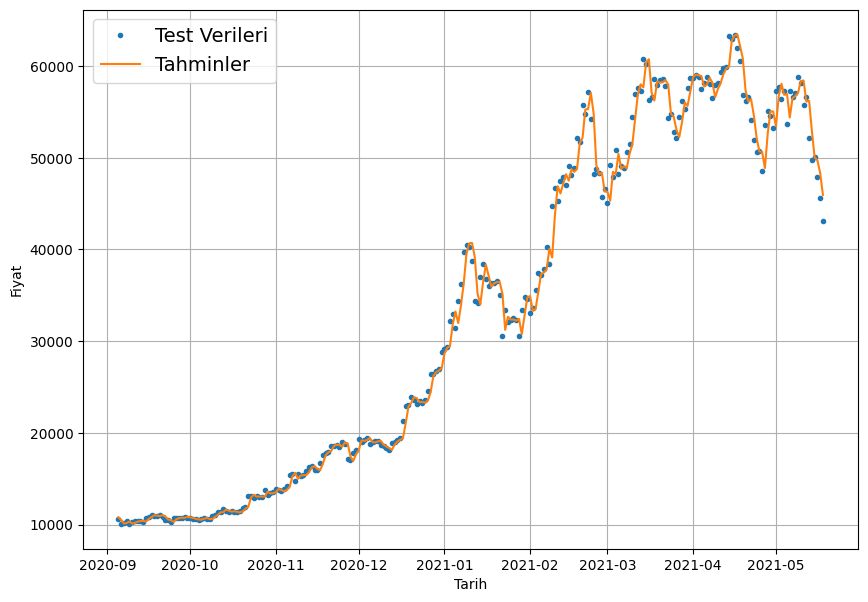

In [119]:
offset = 300

plt.figure(figsize = (10,7))

draw_graph(tarih = xtest[-len(test_aralik):], deger = test_etiket[:,0],start = offset, label = "Test Verileri")
draw_graph(tarih = xtest[-len(test_aralik):], deger = model_tahminleri,start = offset, label = "Tahminler", format = '-')

Bitcoin blok ödülü miktarı, bir kişinin bir Bitcoin bloğunu madencilik yoluyla çıkardığında aldığı Bitcoin miktarını ifade eder.

Başlangıçta, Bitcoin blok ödülü miktarı 50 idi.

Ancak yaklaşık dört yılda bir, Bitcoin blok ödülü yarı yarıya düşer.

Örneğin, blok ödülü miktarı 50'den (Ocak 2009'da başlayarak) 28 Kasım 2012'de 25'e düştü.

Aşağıdaki linkten blok ödülleri ile ilgili işimize yaracak verileri toparladım.
(https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving).

In [120]:
blok_od1 = 25 # 28 Kasım 2012
blok_od2 = 12.5 # 9 Haziran 2016
blok_od3 = 6.25 # 11 Mayıs 2020

# Blok ödülü tarihleri

blok_od1_tarih = np.datetime64("2012-11-28")
blok_od2_tarih = np.datetime64("2016-07-09")
blok_od3_tarih = np.datetime64("2020-05-11")

# Farklı blok tarihlerini eklemek için tarih dizinlerini alalım.

blok_od1_g = (blok_od2_tarih - fiyatlar.index[0]).days
blok_od2_g = (blok_od3_tarih - fiyatlar.index[0]).days

blok_od1_g, blok_od2_g

(1012, 2414)

In [121]:
# Blok ödülü özelliğini verilerimize ekleyelim

fiyatlar_blok = fiyatlar.copy()
fiyatlar_blok["blok_odulu"] = None

fiyatlar_blok.iloc[:blok_od1_g, -1] = blok_od1
fiyatlar_blok.iloc[blok_od1_g:blok_od2_g, -1] = blok_od2
fiyatlar_blok.iloc[blok_od2_g:, -1] = blok_od3
fiyatlar_blok.head()

,Fiyat,blok_odulu
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


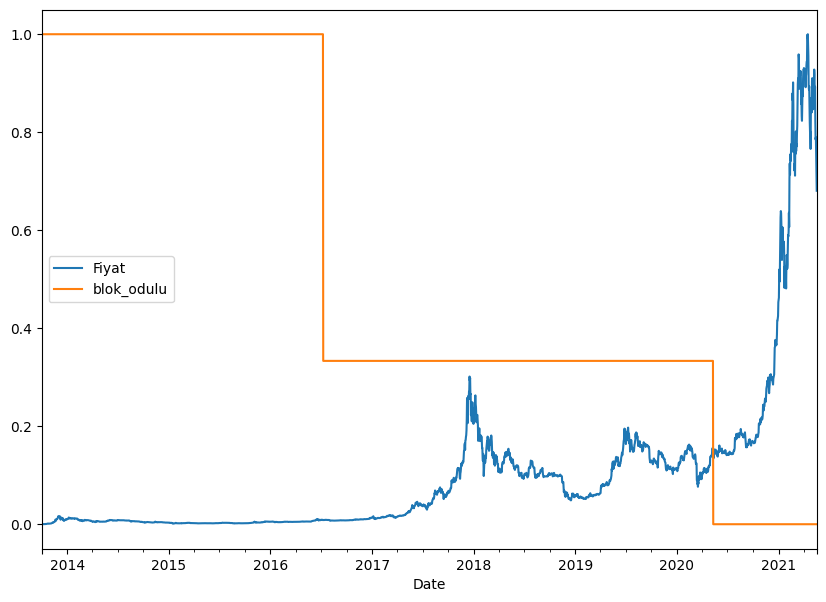

In [122]:
# Çizdirip neye benzediğini görelim


from sklearn.preprocessing import minmax_scale

fiyat_blok_df = pd.DataFrame(minmax_scale(fiyatlar_blok[["Fiyat", "blok_odulu"]])
,columns = fiyatlar_blok.columns,
                                     index = fiyatlar_blok.index)
fiyat_blok_df.plot(figsize = (10,7));

Göz atarsak blok ödülü yüksekken fiyatların düşük, ortayken orta, düşükken yüksek (ters orantılı) olduğunu gözlemleyebiliyoruz. Tahminlerimizde bunu da kullanalım.

## Aşama 4: Geleceğe Yönelik Tahminler ❇

In [123]:
# Yeni özelliğimizle aralanmış bir veriseti oluşturalım

avs = fiyatlar_blok.copy()

# Aralanmış sütunları ekleyelim
for i in range(ARALIK):
  avs[f"Fiyat + {i+1}"] = avs["Fiyat"].shift(periods = i+1)
avs.head(10)

,Fiyat,blok_odulu,Fiyat + 1,Fiyat + 2,Fiyat + 3,Fiyat + 4,Fiyat + 5,Fiyat + 6,Fiyat + 7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [124]:
# Veri setimizdeki boşlukları kaldıralım; features ve target oluşturalım

x = avs.dropna().drop(["Fiyat", "blok_odulu"], axis = 1).astype(np.float32)
y = avs.dropna()["Fiyat"].astype(np.float32)

x.head()

,Fiyat + 1,Fiyat + 2,Fiyat + 3,Fiyat + 4,Fiyat + 5,Fiyat + 6,Fiyat + 7
Date,,,,,,,
2013-10-08,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [125]:
# Verilerimizi işleyelim

final_data = tf.data.Dataset.from_tensor_slices(x)
final_target = tf.data.Dataset.from_tensor_slices(y)

data = tf.data.Dataset.zip((final_data, final_target))

BATCH_SIZE = 1024

data = data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [126]:
# Yeni bir model oluşturma

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(UFUK)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam())

model.fit(data,
          epochs = 100,
          verbose = 1)

Epoch 1/100
3/3 [==============================] - 1s 9ms/step - loss: 4488.8662
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 2074.6938
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 584.0797
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 1157.6986
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 759.4295
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 523.0498
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 686.6205
Epoch 8/100
3/3 [==============================] - 0s 8ms/step - loss: 496.0820
Epoch 9/100
3/3 [==============================] - 0s 9ms/step - loss: 513.0764
Epoch 10/100
3/3 [==============================] - 0s 9ms/step - loss: 544.9196
Epoch 11/100
3/3 [==============================] - 0s 9ms/step - loss: 426.0231
Epoch 12/100
3/3 [==============================] - 0s 11ms/step - loss: 479.1942
Epoch 13/100
3/3 [==============

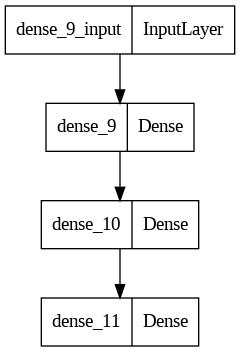

In [127]:
from tensorflow.keras.utils import plot_model
plot_model(model)

Modelimiz böyle basit bir model. Hadi deneyelim.

In [128]:
nd = 14 # gelecek on dört günün tahminini yapacağız.

def gte(deger, model, nd, aralik = ARALIK) -> list:

  gts = []
  sa = deger[-ARALIK:]

  for _ in range(nd):
    gt = model.predict(tf.expand_dims(sa, axis = 0))
    print(f"Üzerinde Çalışılan: \n {sa} -> Tahmin: {tf.squeeze(gt).numpy()}\n")
    gts.append(tf.squeeze(gt).numpy())
    sa = np.append(sa, gt)[-ARALIK:]
  return gts

In [129]:
gts = gte(deger = y,
          model = model,
          nd = nd)

1/1 [==============================] - 0s 70ms/step
Üzerinde Çalışılan: 
 Date
2021-05-12    56573.554688
2021-05-13    52147.820312
2021-05-14    49764.132812
2021-05-15    50032.691406
2021-05-16    47885.625000
2021-05-17    45604.617188
2021-05-18    43144.472656
Name: Fiyat, dtype: float32 -> Tahmin: 55371.76171875

1/1 [==============================] - 0s 22ms/step
Üzerinde Çalışılan: 
 [52147.82  49764.133 50032.69  47885.625 45604.617 43144.473 55371.76 ] -> Tahmin: 51252.07421875

1/1 [==============================] - 0s 23ms/step
Üzerinde Çalışılan: 
 [49764.133 50032.69  47885.625 45604.617 43144.473 55371.76  51252.074] -> Tahmin: 48356.7734375

1/1 [==============================] - 0s 28ms/step
Üzerinde Çalışılan: 
 [50032.69  47885.625 45604.617 43144.473 55371.76  51252.074 48356.773] -> Tahmin: 49152.8046875

1/1 [==============================] - 0s 24ms/step
Üzerinde Çalışılan: 
 [47885.625 45604.617 43144.473 55371.76  51252.074 48356.773 49152.805] -> Tahmin: 464

### Geleceğe Yönelik Tahminlerimizi Çizdirmek

In [130]:
def gfd(start, nd, offset = 1):
  start = start + np.timedelta64(offset, "D")
  end = start + np.timedelta64(nd, "D")
  return np.arange(start, end, dtype = "datetime64[D]")

In [131]:
son_tarih = fiyatlar.index[-1]
son_tarih

Timestamp('2021-05-18 00:00:00')

In [132]:
tahmin_edilecek_tarihler = gfd(start = son_tarih,
                               nd = nd)
tahmin_edilecek_tarihler

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [133]:
tahmin_edilecek_tarihler = np.insert(tahmin_edilecek_tarihler, 0, son_tarih)
gelecek_tahminleri = np.insert(gts, 0, fiyatlarn[-1])
tahmin_edilecek_tarihler, gelecek_tahminleri

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55371.76 , 51252.074, 48356.773, 49152.805, 46464.758,
        46263.473, 47614.676, 53791.742, 49919.395, 47546.68 , 48287.723,
        46424.46 , 47694.023, 49789.203], dtype=float32))

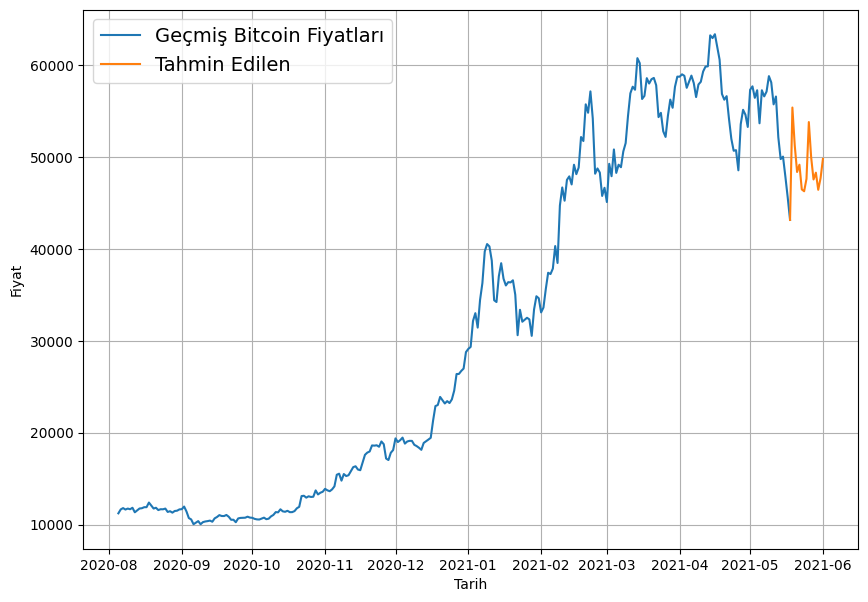

In [134]:
plt.figure(figsize = (10,7))
draw_graph(fiyatlar.index, fiyatlarn, start = 2500, format = "-", label="Geçmiş Bitcoin Fiyatları")
draw_graph(tahmin_edilecek_tarihler, gelecek_tahminleri, format = "-", label="Tahmin Edilen")


Mesela, 100 gün sonrasını tahmin etseydik ?

1/1 [==============================] - 0s 24ms/step
Üzerinde Çalışılan: 
 Date
2021-05-12    56573.554688
2021-05-13    52147.820312
2021-05-14    49764.132812
2021-05-15    50032.691406
2021-05-16    47885.625000
2021-05-17    45604.617188
2021-05-18    43144.472656
Name: Fiyat, dtype: float32 -> Tahmin: 55371.76171875

1/1 [==============================] - 0s 35ms/step
Üzerinde Çalışılan: 
 [52147.82  49764.133 50032.69  47885.625 45604.617 43144.473 55371.76 ] -> Tahmin: 51252.07421875

1/1 [==============================] - 0s 22ms/step
Üzerinde Çalışılan: 
 [49764.133 50032.69  47885.625 45604.617 43144.473 55371.76  51252.074] -> Tahmin: 48356.7734375

1/1 [==============================] - 0s 26ms/step
Üzerinde Çalışılan: 
 [50032.69  47885.625 45604.617 43144.473 55371.76  51252.074 48356.773] -> Tahmin: 49152.8046875

1/1 [==============================] - 0s 24ms/step
Üzerinde Çalışılan: 
 [47885.625 45604.617 43144.473 55371.76  51252.074 48356.773 49152.805] -> Tahmin: 464

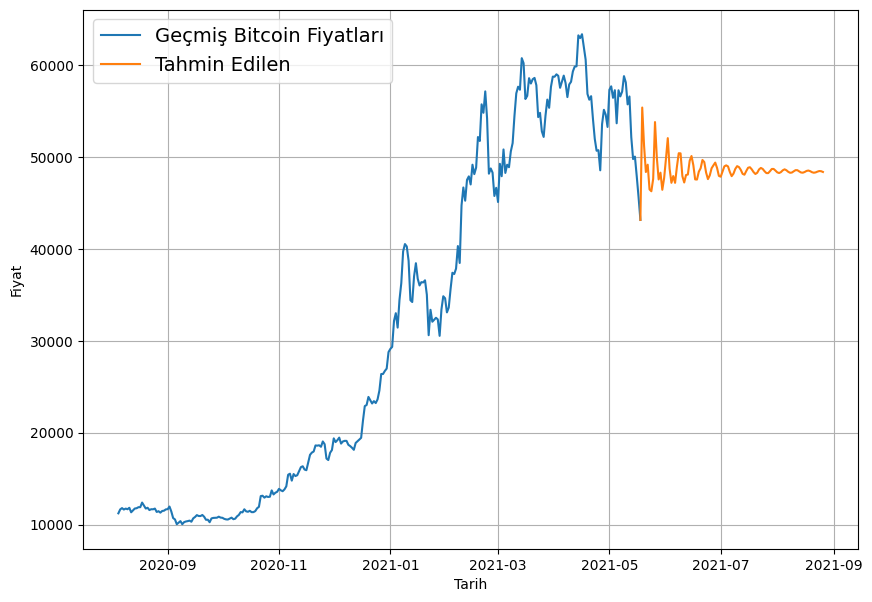

In [135]:
nd = 100
gts = gte(deger = y,
          model = model,
          nd = nd)
son_tarih = fiyatlar.index[-1]

tahmin_edilecek_tarihler = gfd(start = son_tarih,
                               nd = nd)

tahmin_edilecek_tarihler = np.insert(tahmin_edilecek_tarihler, 0, son_tarih)
gelecek_tahminleri = np.insert(gts, 0, fiyatlarn[-1])

plt.figure(figsize = (10,7))
draw_graph(fiyatlar.index, fiyatlarn, start = 2500, format = "-", label="Geçmiş Bitcoin Fiyatları")
draw_graph(tahmin_edilecek_tarihler, gelecek_tahminleri, format = "-", label="Tahmin Edilen")


Açıkçası, tahminlerimiz bir döngüye giriyor, ve tahmin etme aralığı uzadıkça modelimiz saçmalıyor. Peki bu neden kaynaklı? Hadi sebebini araştıralım.

## Hindi Problemi 🦃

Araştırdığım ve kendi kaynağımda şöyle bir benzetme okudum:

Bir adam şükran günü için bir hindi satın alıyor, hindiyi o güne dek besleyip güzelce bakıyor ve o gün geldiğinde hindinin sonu malum. Peki hindi 364 gün beslenip 1 gün hazin sonla karşılaşacağını nereden tahmin edebilirdi?

Bizim durumumuz da buna benziyor. Her yıl yükselen piyasa bu yıl neden çakılsın?

Küçük bir deney yapalım; hindiyi hazin sonuna elimizle ulaştırıp, modelimizin tepkisini ölçelim.

In [136]:
fiyatlar_cakilan = fiyatlarn.copy()
fiyatlar_cakilan[-1] = fiyatlar_cakilan[-1] / 200

In [137]:
fiyatlar_cakilan[-5:]

array([49764.1320816 , 50032.69313676, 47885.62525472, 45604.61575361,
         215.72235645])

Gerçekten sert bir düşüş oldu..

In [163]:
tarihler_cakilan = np.array(fiyatlar.index)
tarihler_cakilan[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

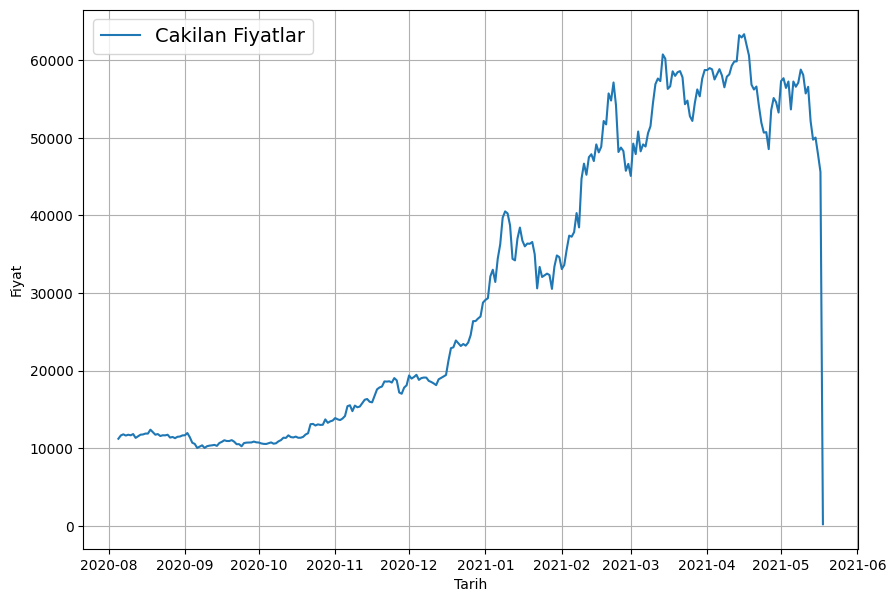

In [139]:
plt.figure(figsize = (10,7))

draw_graph(tarih=tarihler_cakilan,
           deger = fiyatlar_cakilan,
           format = "-",
           label = "Cakilan Fiyatlar",
           start = 2500)

Bu verilerle modelimizi yeniden eğiteceğiz.

In [141]:
t,f = arala(np.array(fiyatlar_cakilan), aralik= ARALIK, ufuk =UFUK)

xtr,ytr,xt,yt = veri_bol(t,f)
len(xtr),len(xt),len(ytr),len(yt)

(2224, 556, 2224, 556)

In [142]:
model.fit(xtr, ytr,
          epochs = 100,
          verbose = 0,
          validation_data = (xt, yt),
          callbacks = [create_model_checkpoint(model.name)])

In [143]:
model.evaluate(xt, yt)

18/18 [==============================] - 0s 5ms/step - loss: 856.8959


856.8959350585938

In [144]:
model.name

'sequential_1'

In [145]:
model = tf.keras.models.load_model("model_experiments/sequential_1")
model.evaluate(xt,yt)

18/18 [==============================] - 0s 2ms/step - loss: 641.7886


641.7886352539062

In [149]:
cakilan_tahminler[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8839.744, 8778.162, 9033.314, 8751.406, 8759.279, 8749.982,
       8670.078, 8514.83 , 8468.425, 8525.621], dtype=float32)>

In [151]:
cakilan_tahminler = tahmin_et(model, xt)
sonuclar = tahminleri_degerlendir(ytrue = yt,
                                  ypred = cakilan_tahminler)

sonuclar

18/18 [==============================] - 0s 2ms/step


{'mae': 17137.424,
 'mse': 615030300.0,
 'rmse': 23731.088,
 'mape': 129.85492,
 'mase': 26.504282}

MSE' deki artışı gördünüz mü ?

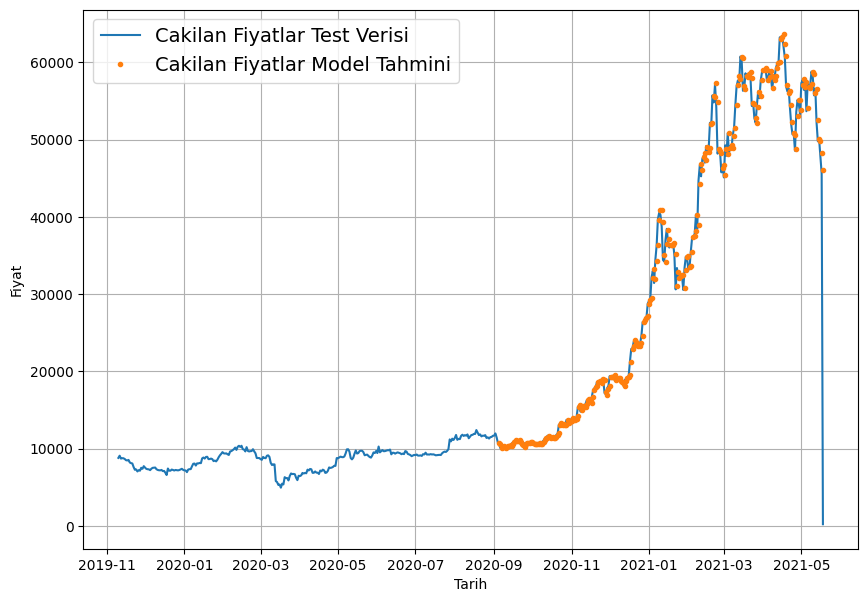

In [171]:
plt.figure(figsize = (10,7))
offset = 300
draw_graph(tarihler_cakilan[-len(xt):],
         fiyatlar_cakilan[-len(yt):],
                                  format = "-",
         label = "Cakilan Fiyatlar Test Verisi")
draw_graph(tarih = tarihler_cakilan[-len(xt):],
         deger = cakilan_tahminler,
         label = "Cakilan Fiyatlar Model Tahmini",
         start = offset)

Bu durum neden yaşanıyor?

Neden modelimiz hindi problemi veri noktasını yakalayamıyor?

Şunu düşünün, tıpkı 1000 mutlu gün yaşayan bir hindi gibi, sadece gözlemlemeye dayanarak 1001. günün geçmişteki gibi mutlu olmayacağına dair hiçbir neden yoktur. Aynı şekilde, Bitcoin'in tarih verileri üzerinde eğitilmiş bir modelin, fiyatın bir günde 100 kat düştüğü tek bir olayın bulunmadığı bir geçmiş veri setine sahip olduğu durumda, bu tür bir olayın gelecekte gerçekleşeceğini tahmin etme nedeni yoktur.

Bir model, eğitildiği dağılımın dışında gelecekte herhangi bir şeyi tahmin edemez.

Sonuç olarak, tarihsel hareketlere dayanarak (tarihsel hareketlere dayalı olarak) son derece olası fiyat hareketleri, yukarı veya aşağı doğru, muhtemelen tahminin bir parçası olmayacaktır.

## Değerlendirme ve Projeninin 1. Bölümünün Kapanışı 📕

Bitcoin fiyatlarını etkileyen tek durum geçmişteki fiyatları ya da blok ödülleri değilidr. ( Öyle olsaydı bu projeyi paylaşır mıydım 😆)

Fiyatların değişiminde bir çok neden etkilidir. Ve bazı nedenler itina ile gizlendiği için, bu nedenler hakkında bir veri toplayabilmemiz pek mümkün değil.

Ancak projenin 2. bölümünde, gündemdeki olayların fiyatları nasıl etkilediğini değerlendirip ona göre tahmin yapan bir sinir ağı inşa edeceğiz.

Göz gezdirdiğin için teşekkürler! Öğrendiklerimi uygulayarak sizinle paylaşmak benim için çok kıymetli!

⭐**Rigel** `Castiel & Balthazar`

Luftwaffe Science & Art AI Org (has been closed.)